<a href="https://colab.research.google.com/github/ChidexCJ/Natural-language-processing/blob/main/Natural%20language%20processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS OF  MOVIE RATINGS APPLYING NLTK
# SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE WAS USED IN BIAS HANDLING
# DATASET WAS SOURCED FROM kaggle.com
# BY: CHIDIEBERE AFAMEFUNA

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import string
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('/dsotm_reviews.csv')

In [20]:
data.head()

,Review,Rating
0,"""More has been said about Dark Side of the Moo...",4.5
1,What can I possibly say about an album that no...,5.0
2,You know for a band that spent several albums ...,2.0
3,Has finally clicked with me in full ...,4.0
4,So why are people afraid to say this...,4.5


In [21]:
data.dtypes

Review     object
Rating    float64
dtype: object

In [22]:

data["Rating"].unique()

array([4.5, 5. , 2. , 4. , 3. , nan, 3.5, 2.5, 1. , 0.5, 1.5])

In [23]:
text = data.iloc[0, 0]

In [24]:
text

'"More has been said about Dark Side of the Moon than will ever be necessary both positive and negative. I see no reason to assess the albums actual music in this review as my fondness for it is likely rooted in the same reasoning and emotion as most other people who rank it amongst the best albums theyve heard. Still I feel some obligation to explain myself. Many critically acclaimed albums have fallen short of their reputations against my eardrums and this one is an exception.nnWere I asked to describe a perfect hypothetical album I think my response (were I ever able to come up with a response) would not reflect many characteristics of Dark Side of the Moon. As years have passed and my knowledge of music has expanded Ive learned to appreciate a great deal of sounds and ideas which would have been bothersome to me when this album was dominant over my speakers. My perspective as a music listener has adapted to embrace a variety diverse enough that many of my original favorites now sou

In [25]:
data.shape

(1548, 2)

In [26]:
data.dropna(thresh=2, inplace=True)

In [27]:
data.isna().sum()

Review    0
Rating    0
dtype: int64

In [28]:
df = data.copy()

In [29]:
df["Review"][3]

'          Has finally clicked with me in full after 30 years absolutely smashing the previous record of 13 years set by Nevermind. Its never too late for you and an album kids.nn(Thats entirely too glib so let me expand on that: Dark Side of the Moon as my fathers favourite album of all time has been part of my life for literally as long as Ive been aware of the existence of music and Ive always loved the first five tracks liked the next two and really disliked the last three; theyve always been a sticking point when Ive listened to it in the past and have always prevented me from truly loving this album particularly when Wish You Were Here and The Wall exist. On further reflection now "Any Colour You Like" and "Eclipse" are both perfectly enjoyable despite being a little on the inconsequential side compared to what goes before them and it turns out its only the verses of "Brain Damage" that I really dislike - I might well skipped this song as much as any over my lifetime with that fi

In [30]:
def standardize_text(df, field):
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(), !?@\'\'\"\_\n]", " ")

In [31]:
standardize_text(data,"Review")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [32]:
#To determine Review text length distribution

review_len = pd.Series([len(j.split()) for j in data["Review"]])

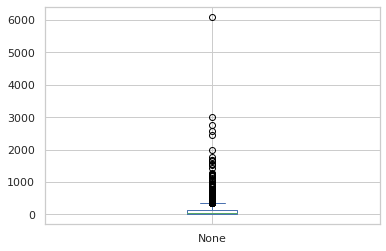

In [33]:

review_len.plot(kind="box")

**Exploratory Data Analysis:**

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
sns.set_theme(context="notebook", style="whitegrid", palette = "deep", font="sans-serif", font_scale=1, color_codes=True, rc=None)


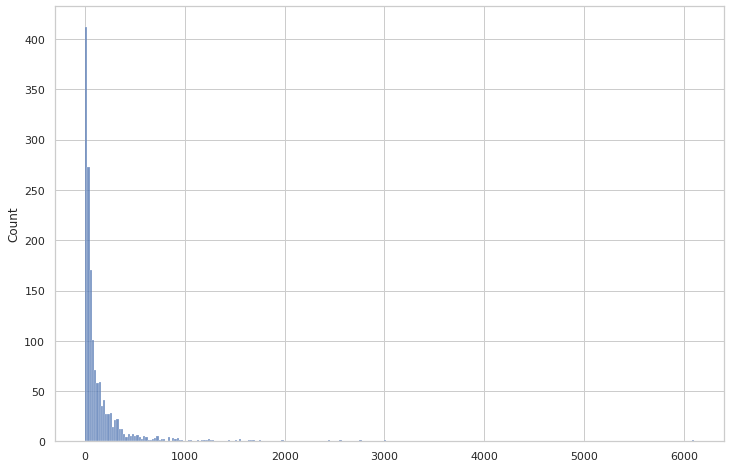

In [36]:

plt.figure(figsize=(12,8))
sns.histplot(review_len)

In [37]:
data["Length"] = data.Review.str.split().apply(len)

In [38]:
data.head()

,Review,Rating,Length
0,"""More has been said about Dark Side of the Moo...",4.5,323
1,What can I possibly say about an album that no...,5.0,630
2,You know for a band that spent several albums ...,2.0,712
3,Has finally clicked with me in full ...,4.0,290
4,So why are people afraid to say this...,4.5,159


count     841.000000
mean      121.315101
std       308.836564
min         0.000000
25%        15.000000
50%        43.000000
75%       116.000000
max      6101.000000
Name: Length, dtype: float64

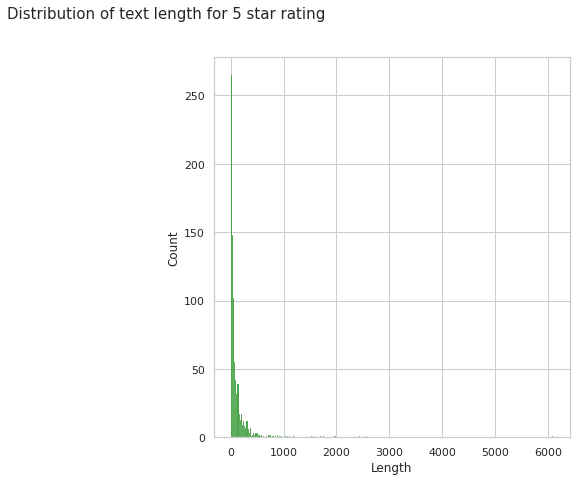

In [39]:
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data["Rating"]==5]["Length"], ax = ax1, color="green")
fig.suptitle("Distribution of text length for 5 star rating", fontsize=15)
display(data.Length[data.Rating==5].describe())

In [40]:
from wordcloud import WordCloud

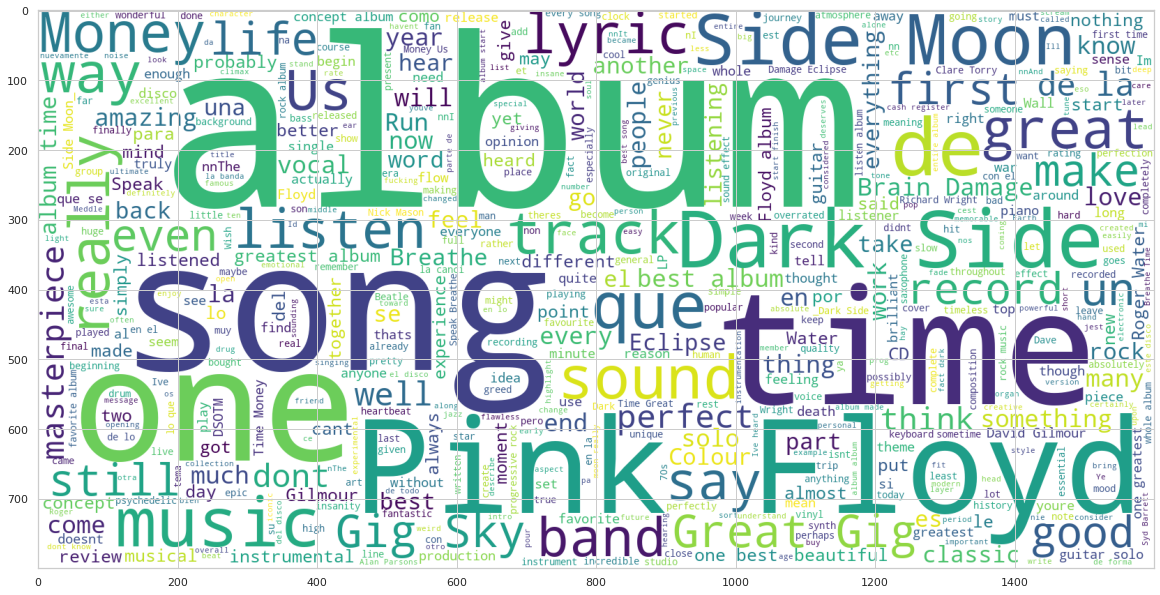

In [41]:
plt.figure(figsize=(20,20))
wcl  = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, background_color="white").generate(
    " ".join(data[data["Rating"]==5].Review))
plt.imshow(wcl)

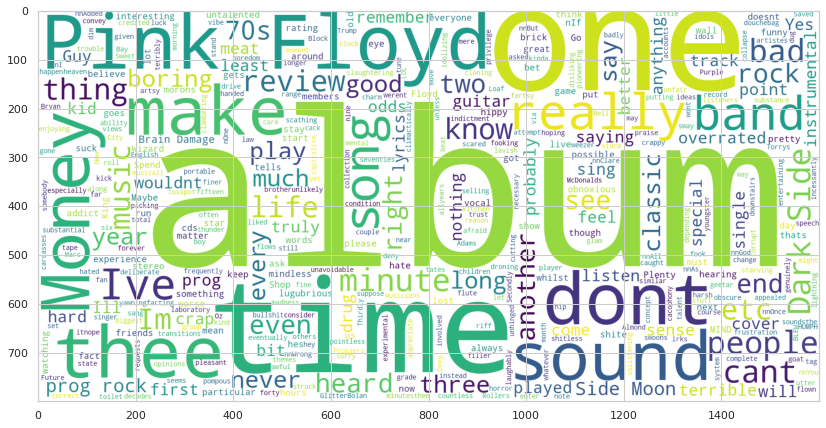

In [42]:
plt.figure(figsize=(14,14))
wcl  = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, background_color="white").generate(
    " ".join(data[data["Rating"]==1].Review))
plt.imshow(wcl)

In [43]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
df.dropna(subset = ["Rating"], inplace=True)

In [45]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [46]:
df.reset_index(inplace=True)

In [47]:
df["Review"].astype("str")

0       "More has been said about Dark Side of the Moo...
1       What can I possibly say about an album that no...
2       You know for a band that spent several albums ...
3                 Has finally clicked with me in full ...
4                 So why are people afraid to say this...
                              ...                        
1489    "Perhaps the best album of all time. Period. I...
1490    "A very good experimental and psychedelic albu...
1491    What else is there to say Pink Floyd  Darkside...
1492    Goes to show you should watch out for the "cla...
1493    Overblownoverhyped crap one of the most talked...
Name: Review, Length: 1494, dtype: object

In [48]:
corpus = []
for i in range (0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)

In [49]:
df['Rating'] = df.Rating.astype("int")

In [50]:
def sentiment(review):
    if review>=3.5:
        return 1
    else:
        return 0
df["Sentiment"]= df['Rating'].apply(sentiment)

In [51]:
df

,index,Review,Rating,Sentiment
0,0,"""More has been said about Dark Side of the Moo...",4,1
1,1,What can I possibly say about an album that no...,5,1
2,2,You know for a band that spent several albums ...,2,0
3,3,Has finally clicked with me in full ...,4,1
4,4,So why are people afraid to say this...,4,1
...,...,...,...,...
1489,1543,"""Perhaps the best album of all time. Period. I...",5,1
1490,1544,"""A very good experimental and psychedelic albu...",4,1
1491,1545,What else is there to say Pink Floyd Darkside...,5,1
1492,1546,"Goes to show you should watch out for the ""cla...",1,0


In [52]:
df["Sentiment"].value_counts()

1    1228
0     266
Name: Sentiment, dtype: int64

In [53]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [54]:
x = cv.fit_transform(corpus).toarray()

In [55]:
x.shape

(1494, 5000)

In [56]:
y = df['Sentiment']

In [57]:
y.dtype

dtype('int64')

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [60]:
PA = PassiveAggressiveClassifier(random_state=42)

In [61]:
PA.fit(x_train, y_train)

PassiveAggressiveClassifier(random_state=42)

In [62]:
pred = PA.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, f1_score

In [65]:
accuracy_PA = accuracy_score(pred, y_test)
accuracy_PA

0.8106904231625836

In [69]:
f1_PA = f1_score(pred, y_test)
f1_PA

0.8868175765645806

In [71]:
from sklearn.metrics import classification_report
report_PA = classification_report(pred,y_test)
print(report_PA)

              precision    recall  f1-score   support

           0       0.41      0.43      0.42        72
           1       0.89      0.88      0.89       377

    accuracy                           0.81       449
   macro avg       0.65      0.66      0.65       449
weighted avg       0.81      0.81      0.81       449



In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_PA = roc_auc_score(pred,y_test)
roc_auc_PA

0.6569223401119954

***From the classification report, the outcome of the prediction is biased towards class 1.*** 

**APPLYING SMOTE TECHNIQUE IN HANDLING THE CLASS IMBALANCE**

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
oversample = SMOTE()
over_x, over_y = oversample.fit_resample(x,y)
over_x_train, over_x_test, over_y_train, over_y_test = train_test_split(over_x, over_y, train_size=0.3, stratify=over_y)

In [76]:
SMOTE_PA = PassiveAggressiveClassifier(random_state=42)

In [77]:
SMOTE_PA.fit(over_x_train,over_y_train)

PassiveAggressiveClassifier(random_state=42)

In [78]:
pred_smote = SMOTE_PA.predict(over_x_test)

In [79]:
report_SMOTE = classification_report(pred_smote, over_y_test)
print(report_SMOTE)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       971
           1       0.74      0.85      0.79       749

    accuracy                           0.81      1720
   macro avg       0.81      0.81      0.81      1720
weighted avg       0.81      0.81      0.81      1720



The SMOTE influenced classification shows a better balance in class prediction.